# Data Cleaning for EC1B1

In [ ]:
# pip install openpyxl is used to install a module that allows us to read excel files into jupyter 
# Depending on the laptop, this may not need to be installed. Just check if the pd.read_excel() function works.

In [ ]:
pip install openpyxl


In [ ]:
# Installing modules for plotting graphs, pandas for the dataframe,numpy for data analsysis, 
# json in case I need it.
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import json 


In [3]:
# use pd.read_excel() function to import excel files containing raw data from IFS into 
# pandas dataframes in the jupyter notebook.
# Stored in separate variables for each of the dataframes: US data and Spain data (our country)
df_US = pd.read_excel('../US.xlsx')
df_Spain = pd.read_excel('../Spain.xlsm')


In [ ]:
# Renaming columns of the dataframe for the US.
df_US = df_US.rename(columns={'Unnamed: 1': 'Month series', 'Unnamed: 2':'International Reserves',\
                               'Unnamed: 3': 'Consumer Price Index'})
df_US

In [ ]:
# Renaming columns of the dataframe for Spain 
df_Spain = df_Spain.rename(columns = {'Unnamed: 1': 'Month series', 'Unnamed: 2': 'Industrial Production Index',\
'Unnamed: 3': 'Exchange Rates', 'Unnamed: 4': 'International Reserves', 'Unnamed: 5': 'Consumer Price Index' })
df_Spain

Spain Dataframe Variables

In [ ]:
# This is where I construct all the variables for Spain 
Spain_data = {
    'Month series': pd.date_range(start = 'Jan 1960', periods = 372, freq = 'MS'),
    'Exchange rate value': df_Spain['Exchange Rates'][1:],
    'Industrial Production': df_Spain['Industrial Production Index'][1:],
    'Consumer Price Index': df_Spain['Consumer Price Index'][1:],
    'US Consumer Price Index': df_US['Consumer Price Index'][1:],
    'International Reserves': df_Spain['International Reserves'][1:]
}
# Creating a dictionary of values from the dataframes from Spain 
df_month_series = pd.DataFrame(Spain_data)
# Convert into pandas and then make column data points numeric 
df_month_series['Exchange rate value'] = pd.to_numeric(df_month_series['Exchange rate value'])
df_month_series['Industrial Production'] = pd.to_numeric(df_month_series['Industrial Production'])
df_month_series['Consumer Price Index'] = pd.to_numeric(df_month_series['Consumer Price Index'])
df_month_series['US Consumer Price Index'] = pd.to_numeric(df_month_series['US Consumer Price Index'])
# Convert into a pandas dataframe with month series as index
df_month_series.set_index('Month series', inplace=True)
# Create a column for variable Monthly growth in nominal exchange rate and then set pandas columns as variable
# Create all monthly growth variables this way 
df_month_series['Monthly Growth in Nominal Exchange Rate %'] = df_month_series['Exchange rate value'].pct_change() * 100 
Monthly_growth_in_Nominal_Exchange_Rate = df_month_series['Monthly Growth in Nominal Exchange Rate %']
# Note: First year for Industrial production data is empty and thus NaN values appear
df_month_series['Monthly Growth in Industrial Production %'] = df_month_series['Industrial Production'].pct_change() * 100
Monthly_growth_in_Industrial_Production = df_month_series['Monthly Growth in Industrial Production %']
# Monthly inflation as a variable - calculated with monthly % change in CPI 
df_month_series['Monthly Inflation Rate'] = df_month_series['Consumer Price Index'].pct_change() * 100
Monthly_inflation_rate = df_month_series['Monthly Inflation Rate']
# Real exchange rate in terms of dollars. We have nominal exchange rate for Spains currency in terms of US dollars.
# We calculate real exchange rate in terms of dollars for Spain by multiplying nominal exchange rate with US CPI values.
# Then dividing it by the CPI of Spain at the same time - CPI represents the price level of the countries at that time.
df_month_series['Real exchange rate'] = (df_month_series['Exchange rate value'] * df_month_series['US Consumer Price Index'])\
                                         / df_month_series['Consumer Price Index']
Real_exchange_rate = df_month_series['Real exchange rate']
df_month_series['Monthly growth in Real exchange rate %'] = df_month_series['Real exchange rate'].pct_change() * 100
Monthly_growth_in_real_exchange_rate = df_month_series['Monthly growth in Real exchange rate %']
# Growth in Production versus 12 months ago 
df_month_series

In [83]:
#Spain variables continue being defined over here with the growth in production versus 12 months ago 
# First 12 months have no data as the first 12 months don't have values and the last 12 by virtue of not having a next year after 1990.
# Calculated by shifting down the column by 12 rows and then minusing it from the original position.
df_month_series['Growth in Production over 12 months'] = df_month_series['Industrial Production'].shift(-12)\
      - df_month_series['Industrial Production']
Growth_in_production_versus_12_months_ago = df_month_series['Growth in Production over 12 months']
# Calculated variable of index value of international reserves with 1960 as the Jan as the base 
df_month_series['Index of value of international reserves'] = df_month_series['International Reserves']\
        / df_month_series['International Reserves'][0] * 100
Index_of_value_of_international_reserves = df_month_series['Index of value of international reserves']



C:\Users\Josh Yang\AppData\Local\Temp\ipykernel_8420\3614478588.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  / df_month_series['International Reserves'][0] * 100


US dataframe variables 

In [ ]:
# Constructing variables for the US dataframe
US_data = {
    'Month series': pd.date_range(start = 'Jan 1960', periods = 372, freq = 'MS'),
    'US Consumer Price Index': df_US['Consumer Price Index'][1:],
    'US International Reserves': df_US['International Reserves'][1:]
}
df_US_month_series = pd.DataFrame(US_data)
df_US_month_series['US Consumer Price Index'] = pd.to_numeric(df_US_month_series['US Consumer Price Index'])
df_US_month_series['US International Reserves'] = pd.to_numeric(df_US_month_series['US International Reserves'])
df_US_month_series.set_index('Month series', inplace=True)
# Creating variable for monthly inflation in the US
df_US_month_series['Monthly Inflation Rate'] = df_US_month_series['US Consumer Price Index'].pct_change() * 100
Monthly_US_inflation_rate = df_US_month_series['Monthly Inflation Rate']
# Creating index of value of international reserves for the US
df_US_month_series['Index of value of international reserves'] = df_US_month_series['US International Reserves']\
        / df_US_month_series['US International Reserves'][0] * 100
US_index_of_value_of_international_reserves = df_US_month_series['Index of value of international reserves']
df_US_month_series

Plotting Graphs and Time Series

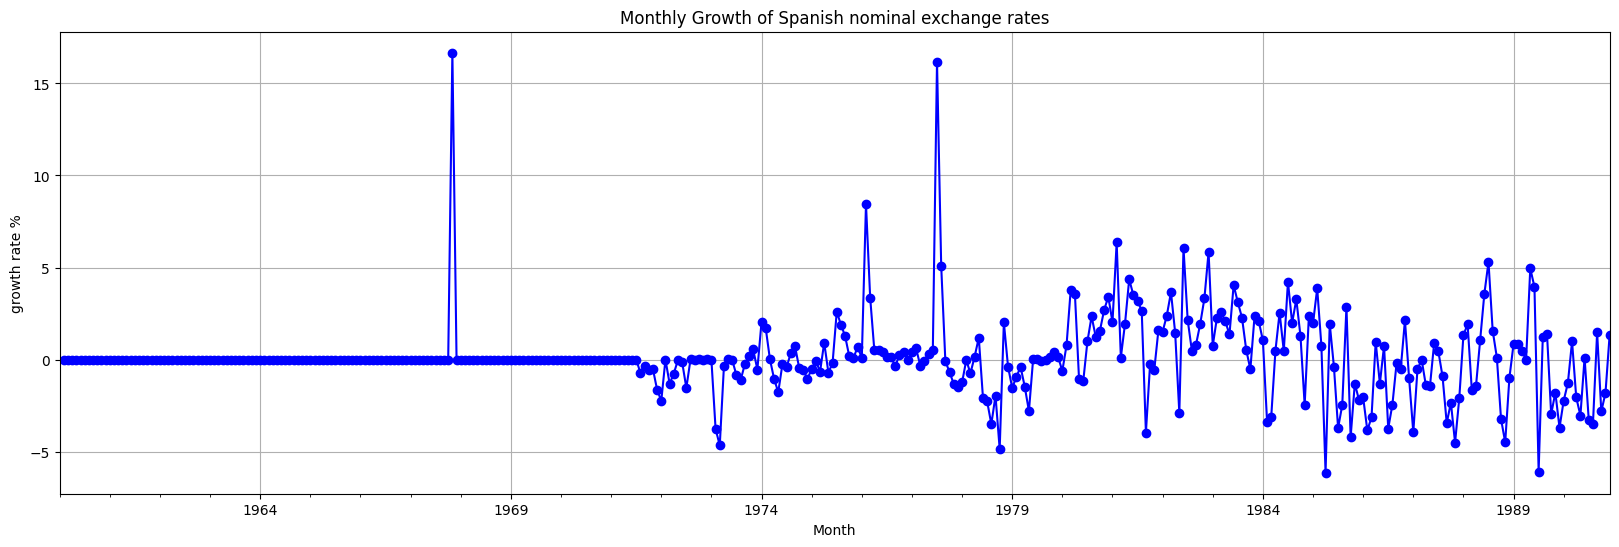

In [65]:
# Plot monthly time series monthly growth of Spanish nominal exchange rates vs US $
plt.figure(figsize=(20, 6))
df_month_series['Monthly Growth in Nominal Exchange Rate %'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Monthly Growth of Spanish nominal exchange rates')
plt.xlabel('Month')
plt.ylabel('growth rate %')
plt.grid(True)
plt.show()

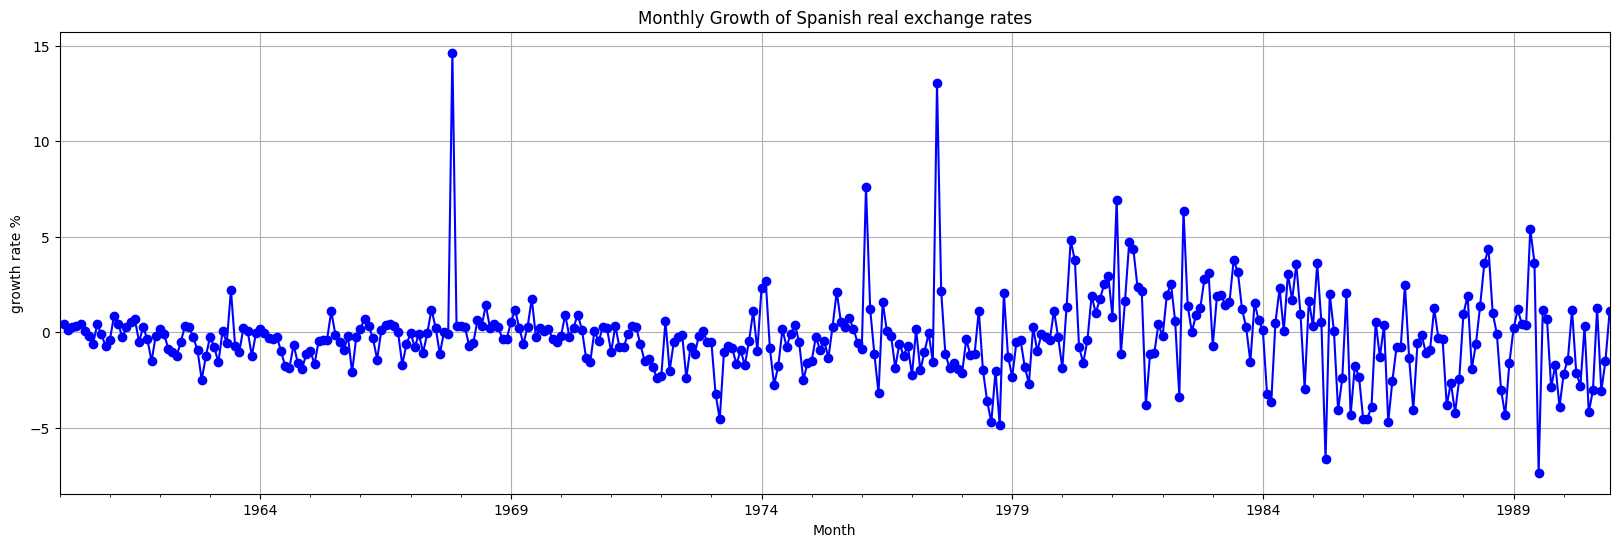

In [70]:
# Plot monthly time series of monthly growth of Spanish real exchange rates vs US $
plt.figure(figsize=(20, 6))
df_month_series['Monthly growth in Real exchange rate %'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Monthly Growth of Spanish real exchange rates')
plt.xlabel('Month')
plt.ylabel('growth rate %')
plt.grid(True)
plt.show()

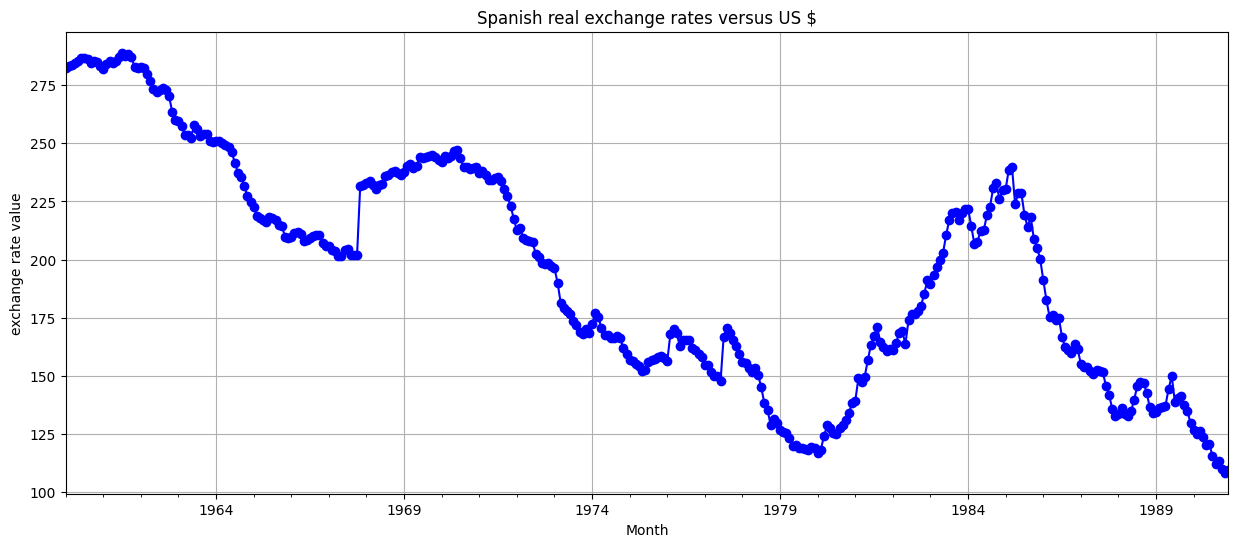

In [72]:
# Plot monthly time series of Spanish real exchange rates versus US $
plt.figure(figsize=(15, 6))
df_month_series['Real exchange rate'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Spanish real exchange rates versus US $')
plt.xlabel('Month')
plt.ylabel('exchange rate value')
plt.grid(True)
plt.show()

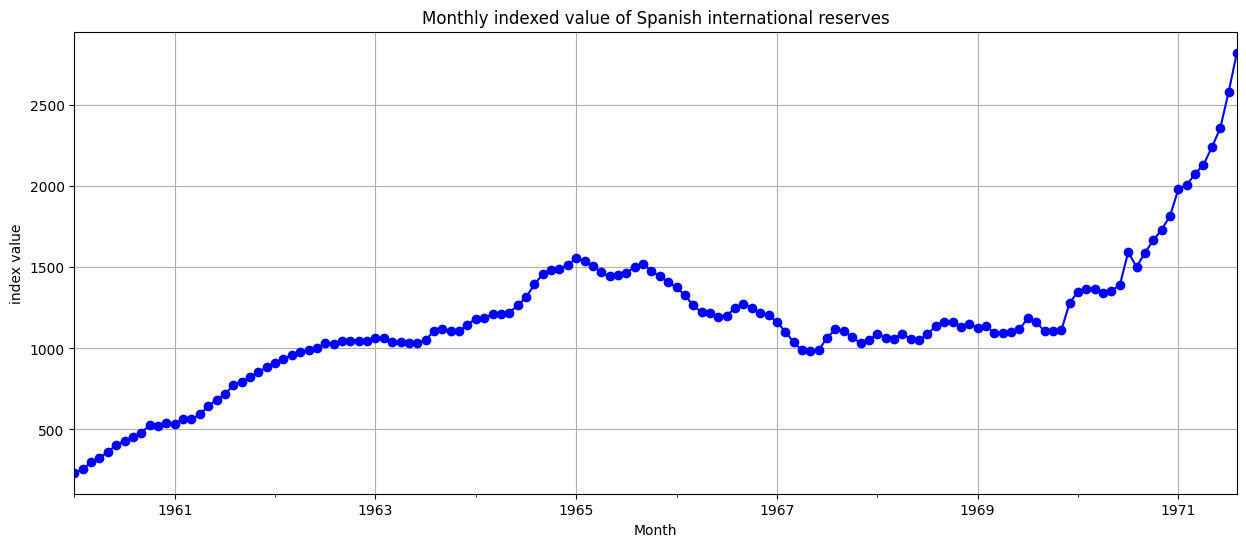

In [77]:
# Plot monthly time series
# Plotting indexed value of Spanish international reserves up till exit of US from Bretton woods in August 1971
plt.figure(figsize=(15, 6))
df_month_series['International Reserves'][0:140].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Monthly indexed value of Spanish international reserves')
plt.xlabel('Month')
plt.ylabel('index value')
plt.grid(True)
plt.show()

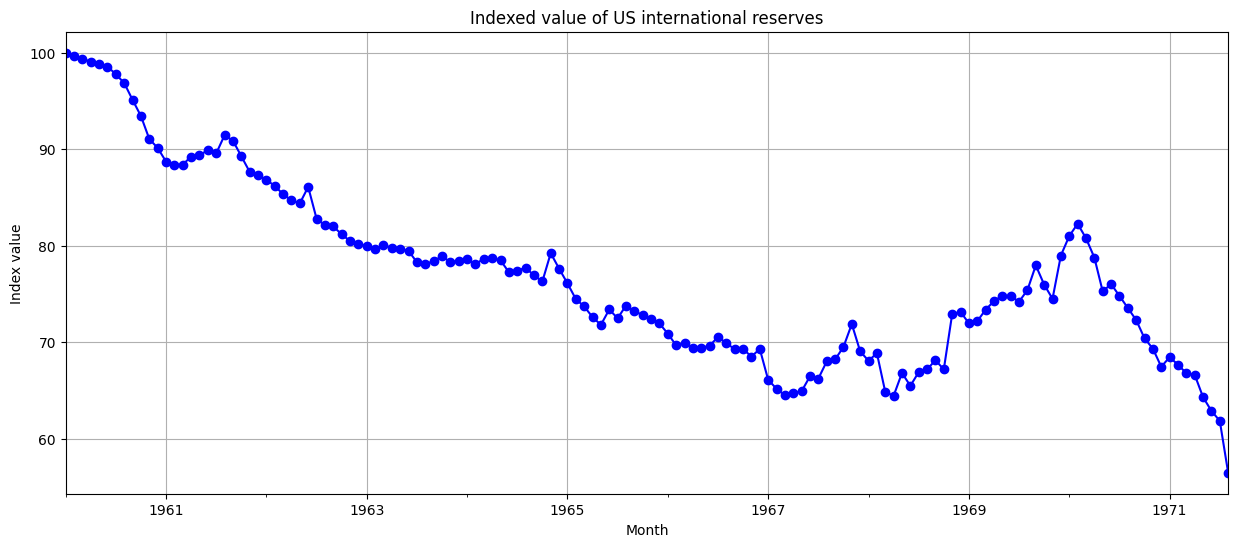

In [78]:
# Plot monthly time series
# Monthly time series of US indexed value of international reserves up till August 1971 and exit of Bretton Woods
plt.figure(figsize=(15, 6))
df_US_month_series['Index of value of international reserves'][0:140].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Indexed value of US international reserves')
plt.xlabel('Month')
plt.ylabel('Index value')
plt.grid(True)
plt.show()

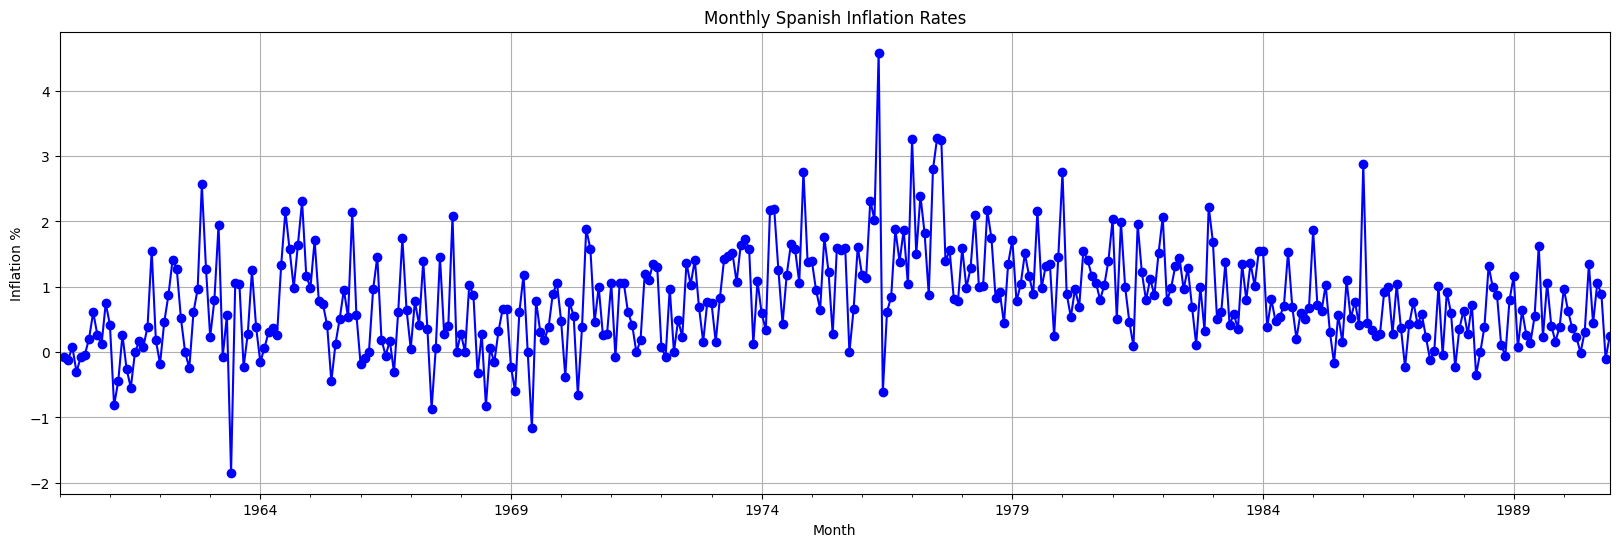

In [80]:
# Plot monthly time series of monthly inflation in Spain 
plt.figure(figsize=(20, 6))
df_month_series['Monthly Inflation Rate'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Monthly Spanish Inflation Rates')
plt.xlabel('Month')
plt.ylabel('Inflation %')
plt.grid(True)
plt.show()

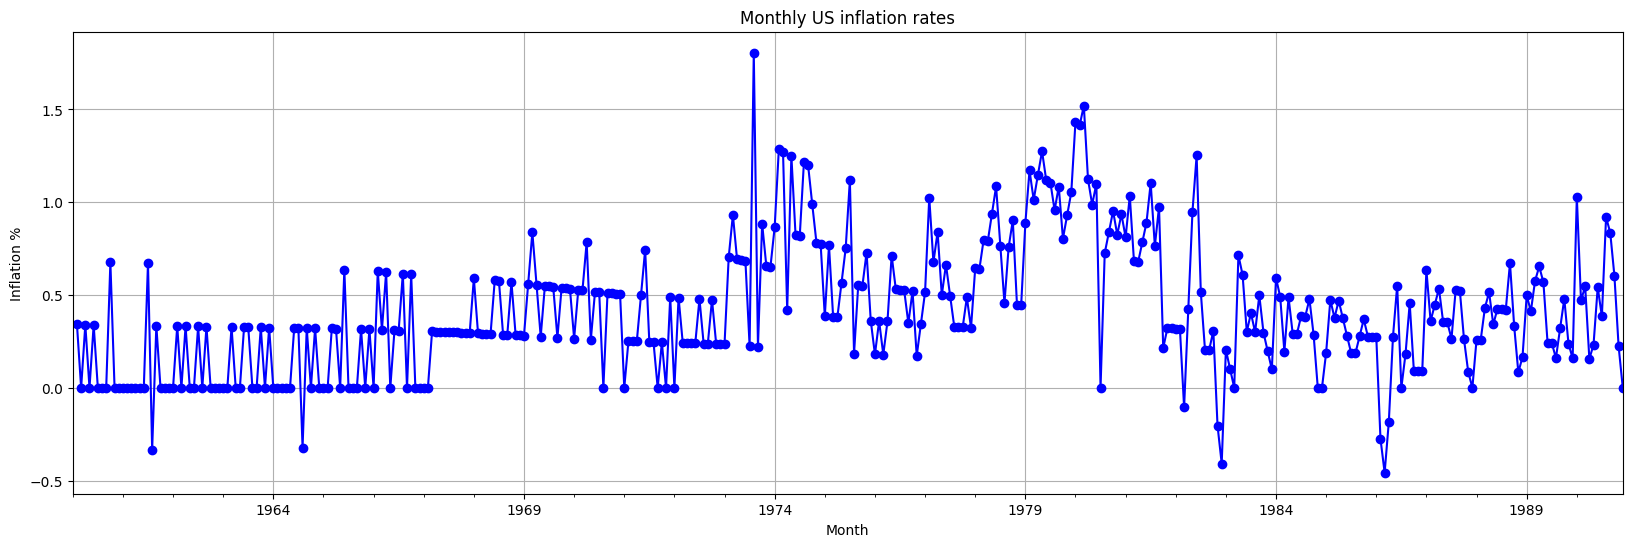

In [81]:
# Plot monthly time series of US inflation rates
plt.figure(figsize=(20, 6))
df_US_month_series['Monthly Inflation Rate'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Monthly US inflation rates')
plt.xlabel('Month')
plt.ylabel('Inflation %')
plt.grid(True)
plt.show()

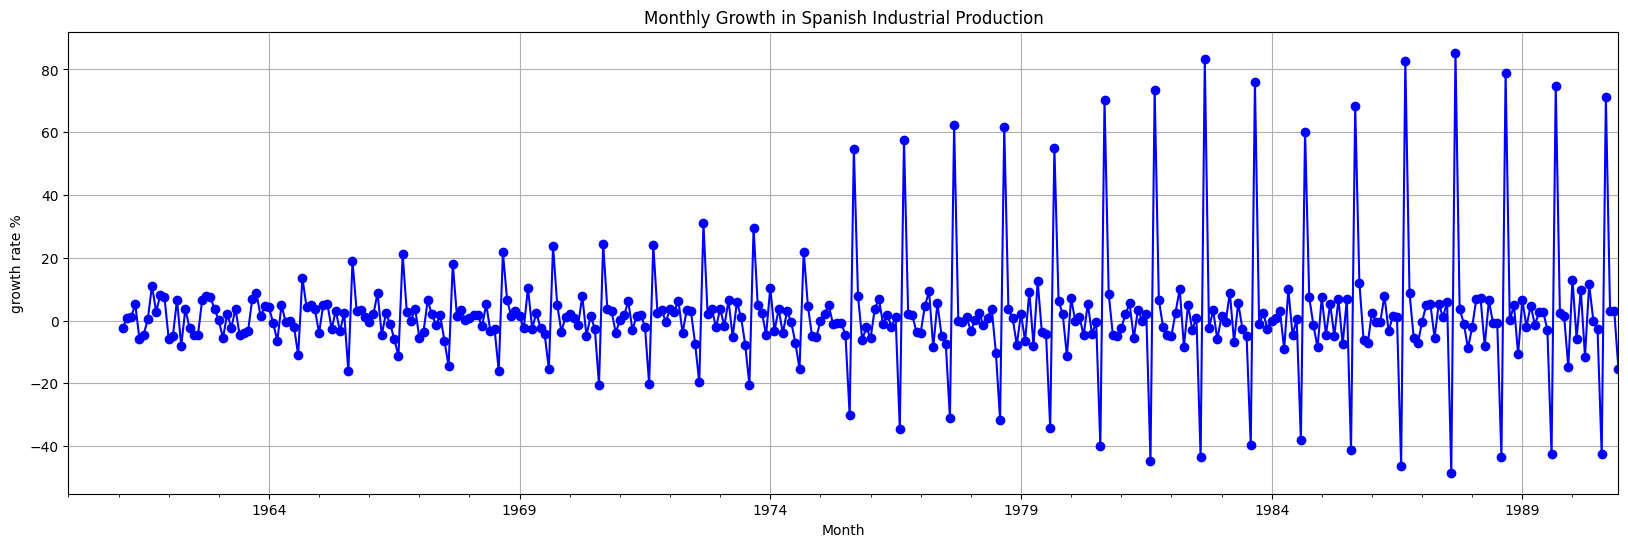

In [82]:
# Plot monthly time series of Monthly growth in Industrial Production in Spain 
plt.figure(figsize=(20, 6))
df_month_series['Monthly Growth in Industrial Production %'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Monthly Growth in Spanish Industrial Production')
plt.xlabel('Month')
plt.ylabel('growth rate %')
plt.grid(True)
plt.show()

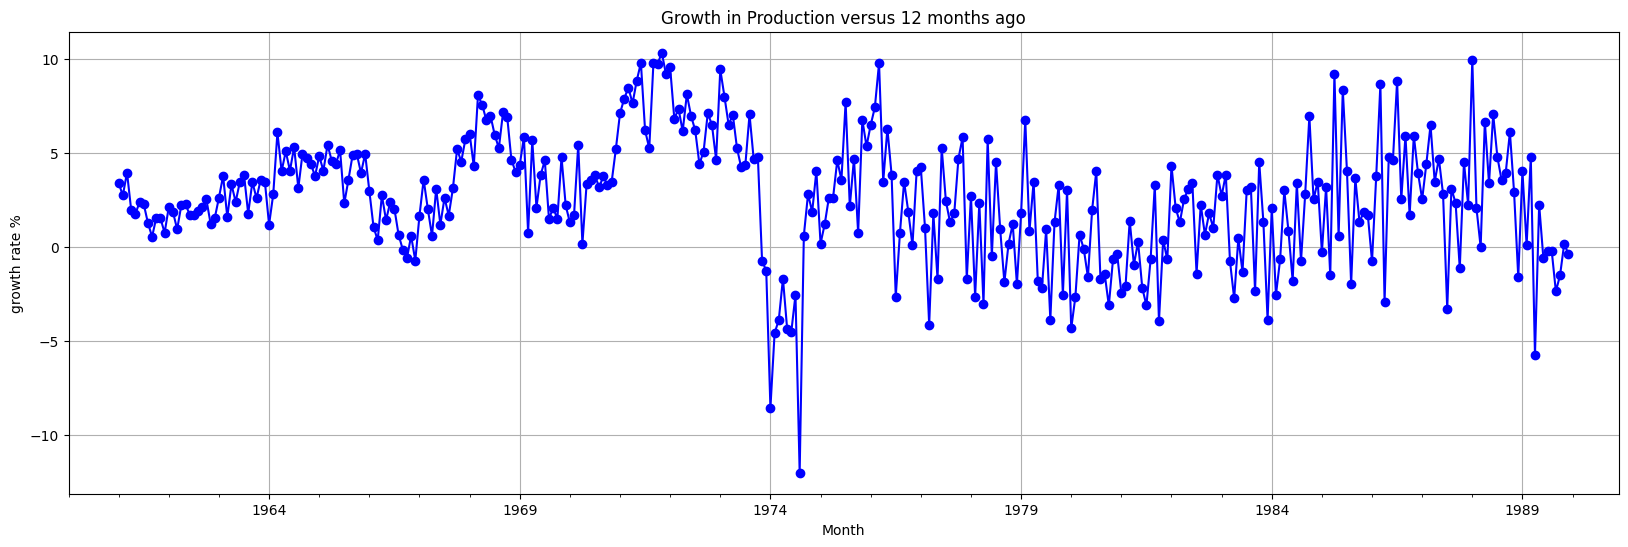

In [84]:
# Plot monthly time series of growth in monthly production versus 12 months ago in Spain 
plt.figure(figsize=(20, 6))
df_month_series['Growth in Production over 12 months'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Growth in Production versus 12 months ago')
plt.xlabel('Month')
plt.ylabel('growth rate %')
plt.grid(True)
plt.show()

Comparison of Statistics 5.3.3

In [90]:
# First define a variable that stores the difference between our countries inflation rate and the US
# Calculated by using Spanish inflation rate minus US inflation rate
df_month_series['Difference between Spain and US inflation rates'] = df_month_series['Monthly Inflation Rate']\
                                                                     - df_US_month_series['Monthly Inflation Rate']
difference_between_spain_and_US_inflation = df_month_series['Difference between Spain and US inflation rates']


In [91]:
# Standard deviation calculations for monthly growth of nominal and real exchange rates
# Standard deviation calculations for monthly inflation and difference in inflation and 12 monthly industrial growth
comparison_statistics_Bretton = {
    'std monthly growth nominal exch rates before Bretton': df_month_series['Monthly Growth in Nominal Exchange Rate %'][0:139].std(),
    'std monthly growth real exch rates before Bretton': df_month_series['Monthly growth in Real exchange rate %'][0:139].std(),
    'std monthly inflation rates before Bretton': df_month_series['Monthly Inflation Rate'][0:139].std(),
    'std difference in inflation between Spain and US before Bretton': df_month_series['Difference between Spain and US inflation rates'][0:139].std(),
    'std 12 monthly industrial growth before Bretton': df_month_series['Growth in Production over 12 months'][0:139].std(),
    'std monthly growth nominal exch rates after Bretton': df_month_series['Monthly Growth in Nominal Exchange Rate %'][156:].std(),
    'std monthly growth real exch rates after Bretton': df_month_series['Monthly growth in Real exchange rate %'][156:].std(),
    'std monthly inflation rates after Bretton': df_month_series['Monthly Inflation Rate'][156:].std(),
    'std difference in inflation between Spain and US after Bretton': df_month_series['Difference between Spain and US inflation rates'][156:].std(),
    'std 12 monthly industrial growth after Bretton': df_month_series['Growth in Production over 12 months'][156:].std()
}
df_comparison_statistics = pd.DataFrame(comparison_statistics_Bretton, index = [0])
df_comparison_statistics

,std monthly growth nominal exch rates before Bretton,std monthly growth real exch rates before Bretton,std monthly inflation rates before Bretton,std difference in inflation between Spain and US before Bretton,std 12 monthly industrial growth before Bretton,std monthly growth nominal exch rates after Bretton,std monthly growth real exch rates after Bretton,std monthly inflation rates after Bretton,std difference in inflation between Spain and US after Bretton,std 12 monthly industrial growth after Bretton
0,1.418761,1.480185,0.72305,0.787233,2.108029,2.57578,2.532923,0.740916,0.747947,3.508513


Merging of the two data frames

In [6]:
# This creates a merged dataframe that concatenates and puts Spain on top of the US dataframe
merged_df = pd.concat([df_Spain, df_US], ignore_index=True)

This is where we print out our merged dataframe in full 

In [ ]:
# Already used a line of code merged_df = merged_df.drop(373) to delete redundant row of headers for the US data
# Used the pd.set_option in order to display all 746 rows of the merged dataframe - note can't do random numbers for this.
# Only works for a certain few: 5, 10, all 746
# In the merged dataframe, there is no data for the year of 1960 in Spain, there is no data at all in the first 12 months
# Therefore, this makes interpolating the data very difficult here and we have left it blank 
# Filled in all the NaN values with '' to make it look nicer.
# Empty columns for the US data is because we only have 2 columns of data - international reserves and CPI per the coursework instructions.
# Any outliers were defined as being +- 3 standard deviations away from the mean of the series
pd.set_option('display.max_rows', 746)
merged_df = merged_df.fillna('')
merged_df